Aqui se muestra una manera de como predecir acciones con el metodo de Monte Carlo.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf           # descarga datos de Yahoo Finance

Ahora descargamos los datos históricos de una empresa de interés.

In [26]:
simbolo = "NVAX"
empresa = yf.Ticker(simbolo)
empresa.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-12-05 00:00:00-05:00,67.500000,85.000000,67.500000,80.000000,3595,0.0,0.0
1995-12-06 00:00:00-05:00,82.500000,87.500000,82.500000,85.000000,340,0.0,0.0
1995-12-07 00:00:00-05:00,87.500000,90.000000,77.500000,90.000000,750,0.0,0.0
1995-12-08 00:00:00-05:00,92.500000,92.500000,82.500000,82.500000,295,0.0,0.0
1995-12-11 00:00:00-05:00,85.000000,87.500000,85.000000,87.500000,75,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-29 00:00:00-04:00,14.910000,15.590000,14.800000,15.110000,9993800,0.0,0.0
2024-05-30 00:00:00-04:00,15.000000,15.660000,14.710000,15.250000,10145100,0.0,0.0
2024-05-31 00:00:00-04:00,15.150000,15.400000,14.200000,15.030000,15742300,0.0,0.0


Rendimiento

$$R_t=log(\dfrac{P_t}{P_{t-1}})$$

In [27]:
tabla = empresa.history(period="max")
tabla["Rendimiento"] = np.log10(tabla["Close"]/tabla["Close"].shift(1))
tabla[["Close","Rendimiento"]]

,Close,Rendimiento
Date,,
1995-12-05 00:00:00-05:00,80.000000,NaN
1995-12-06 00:00:00-05:00,85.000000,0.026329
1995-12-07 00:00:00-05:00,90.000000,0.024824
1995-12-08 00:00:00-05:00,82.500000,-0.037789
1995-12-11 00:00:00-05:00,87.500000,0.025554
...,...,...
2024-05-29 00:00:00-04:00,15.110000,-0.011627
2024-05-30 00:00:00-04:00,15.250000,0.004005
2024-05-31 00:00:00-04:00,15.030000,-0.006311


Calculamos la media y la desviacion estandar.

In [28]:
m = tabla["Rendimiento"].mean()
s = tabla["Rendimiento"].std()

print("Media:",m)
print("Desviacion estandar:",s)

Media: -9.24832888401931e-05
Desviacion estandar: 0.027117669671917224


El punto de partida sera el precio de la accion del dia 2024-05-31 y graficamos una trayectoria de 30 dias para ver el funcionamiento del codigo.

In [29]:
p0 = empresa.history(period="max")["Close"]["2024-5-31"]
print(p0)

15.029999732971191


Ya con los calculos y hechos escribimos el codigo para empezar las simulaciones.

$$P_t=P_0e^{\mu t+\sigma \sqrt{t}z}$$

$$z\sim N(0,1)$$

$P_0$: Precio de accion inicial

$P_t$: Precio de la accion en el tiempo $t$

$t$: unidades de tiempo

$\mu$: Media

$\sigma$: desviacion estandar



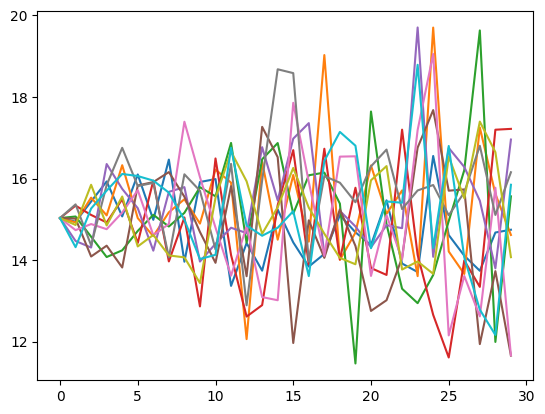

In [30]:
from math import exp,sqrt
from random import normalvariate as z

def T(m,s,p,n):
  l = [p*exp(m*t+s*sqrt(t)*z(0,1)) for t in range(n)]
  return l

n = 30   # unidades de tiempo

t = np.arange(0,n,1)

for i in range(10):
  plt.plot(t,T(m,s,p0,n))

plt.show()

In [31]:
A = np.zeros((10,n))

for i in range(A.shape[0]):
  A[i] = T(m,s,p0,n)

C = pd.DataFrame(A)
C

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,15.03,14.890120,14.877655,14.435575,14.553807,16.151322,13.502994,13.493154,15.313631,14.989670,...,13.908943,18.138358,14.589979,14.380039,11.743988,18.757794,13.293689,14.268684,16.269144,16.135062
1,15.03,15.134309,14.439546,16.042550,16.024414,15.730361,14.468640,16.622143,14.901986,15.071267,...,16.138470,13.197612,13.932354,14.681713,14.730806,15.211495,17.153730,12.571843,16.748595,13.836030
2,15.03,14.771055,14.697552,14.772281,15.603278,14.207374,14.935790,13.129119,17.369148,14.911189,...,12.034149,16.549734,12.616786,17.909415,15.947633,16.767188,15.016323,17.063286,12.431745,15.389835
3,15.03,14.314392,14.907901,14.140919,14.099448,14.682010,13.996508,14.014312,15.031178,13.991061,...,10.399665,13.828023,13.862976,16.969142,16.190421,17.901946,16.189478,11.990932,12.566044,16.424403
4,15.03,14.935235,15.151072,15.576261,14.153030,14.773885,16.032722,15.010193,15.747678,14.408575,...,13.522099,18.190630,15.820536,16.797122,12.393278,12.895255,18.090586,15.083931,12.395167,14.218212
5,15.03,14.940269,14.454666,15.241886,14.091553,16.054502,15.822755,15.688095,15.472691,13.551269,...,14.688509,12.734609,12.727363,20.160399,13.976930,13.878473,14.732292,17.175784,20.329833,13.184063
6,15.03,14.998546,16.074503,15.647137,15.180369,15.362808,14.895051,13.461536,15.392555,17.317477,...,12.919854,18.839648,12.818410,13.927753,17.224671,12.918945,14.752154,12.589253,14.830623,16.738887
7,15.03,14.504460,15.668453,14.860848,15.668988,16.851645,17.164764,15.414222,12.780860,17.493756,...,17.282847,15.725182,14.858306,15.479088,13.999351,14.871157,15.992924,14.236293,12.774606,16.322408
8,15.03,15.762755,15.092139,14.371247,15.741736,14.437030,15.661629,15.195904,16.270929,15.252640,...,15.669774,15.016086,16.095358,13.996324,14.891690,11.852080,15.581438,14.625774,17.334719,11.745877
9,15.03,14.988164,15.757143,14.396125,14.647501,15.885115,16.480963,14.141265,14.802389,14.524393,...,14.322214,16.378239,15.043744,15.494700,13.580857,13.397210,17.917142,14.547138,16.294313,14.812059


In [32]:
print(C.mean())

0     15.030000
1     14.923930
2     15.112063
3     14.948483
4     14.976412
5     15.413605
6     15.296182
7     14.616994
8     15.308304
9     15.151130
10    15.003960
11    15.402893
12    15.420339
13    15.570191
14    14.894760
15    15.027018
16    15.018274
17    15.637618
18    15.003514
19    14.535561
20    14.088652
21    15.859812
22    14.236581
23    15.979570
24    14.467963
25    14.845154
26    15.871976
27    14.415292
28    15.197479
29    14.880684
dtype: float64


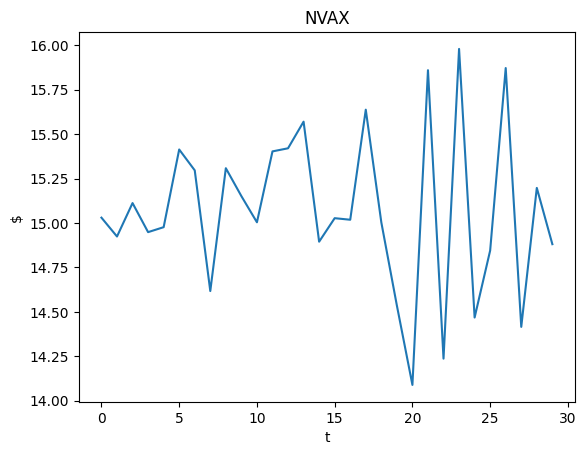

In [33]:
plt.plot(t,C.mean())
plt.title(simbolo)
plt.xlabel("t")
plt.ylabel("$")
plt.show()